# Интернет-магазин «Стримчик»

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно *выявить определяющие успешность игры закономерности*. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**План работы:**
1. Открыть и изучить датасет
2. Подготовить данные
3. Провести исследовательский анализ
4. Составить портрет пользователя по регионам
5. Проверить гипотезы
6. Сформулировать общий вывод

## Шаг 1. Открываем файл с данными и изучаем общую информацию

In [23]:
# для начала импортируем все библиотеки, которые могут понадобиться
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sns

In [24]:
#открываем датасет
game_data = pd.read_csv('/datasets/games.csv')

In [25]:
game_data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Описание данных** 
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Действующие категории рейтинга ESRB:**

1) EC («Early Childhood»)— «Для детей младшего возраста»;

2) E («Everyone»)— «Для всех»;
   
3) E10+ («Everyone 10 and older»)— «Для всех старше 10 лет»;
   
4) T («Teen») - «Подросткам»: Игра подходит для лиц от 13 лет и старше;

5) M («Mature») — «От 17 лет»;

6) AO («Adults Only 18+») — «Только для взрослых»;

7) RP («Rating Pending») — «Рейтинг ожидается».

**Устаревшие**

*Рейтинг ESRB: K-A («Kids to Adults») - «Для детей и взрослых»*

In [26]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [27]:
#просмотрим строки в которых пропущено наименование игры
game_data[game_data['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В этих же строках пропущены и значения жанра

In [28]:
#просмотрим сколько всего строк с платформой GEN
len(game_data[game_data['Platform']=='GEN'])

29

In [29]:
game_data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

### Итоги знакомства с датасетом

1) Необходимо привести название столбцов к нижнему регистру

2) Пропущенные значения в *Name* и *Genre* можно удалить, так как нет возможности восстановить имя, жанр; также отсутствуют значения рейтинга

3) *Year_of_Release* нужно привести к целочисленному типу, так как это год

4) Значение в *User_Score* необходимо привести к типу float

5) Пропущенные значения в *Year_of_Release*, *Critic_Score*, *User_Score*, *Rating* лучше оставить пустыми и вот почему:

- год издания игры конечно можно найти в наименовании, но делать это очень трудно, а таких значений 269. Не факт, что год, указанный в наименовании игры соответствует году издания.
- значения рейтинга лучше не заполнять, ведь присвоенные значения не будут отражать действительность. Мы не знаем из какого источника взят рейтинг и насколько точно он отражает настроение критиков и геймейров да и еще вопрос как их заполнять? Нельзя заполнить их средним рейтингом по жанру, или по году - это может сильно изменить нашу статистику.

Почему могли произойти пропуски в данных? Возможно это ошибки при выгрузки датасета, также критики и пользователи уделяют внимание не всем играм для их оценки, либо владельцы игры попросили убрать рейтинг со всеобщего обозрения.

## Шаг 2. Подготовка данных

* Приводим название столбцов к нижнему регистру

In [30]:
game_data.columns = game_data.columns.str.lower()

* Удалим строки с пропущенными значениями названия и жанра игры

In [31]:
game_data = game_data.dropna(axis='index', subset=['name'])

* *user_score* и рейтинг tbd

In [32]:
game_data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.9       2
0.5       2
0.6       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Среди оценки пользователей мы обнаружили значение "tbd". От английского To Be Determined (будет определено) или To Be Decided (будет решено). То есть рейтинга нет, поэтому для дальнейшей работы лучше не заменять его на значение, так как таких позиций 2424 шт, а заменить на Nan с помощью библиотеки numpy

In [33]:
game_data['user_score'] = game_data['user_score'].replace('tbd', np.NaN)

* Замена типа данных

In [34]:
#заменим тип данных в значении года
game_data['year_of_release'] = game_data['year_of_release'].astype('Int64')
#заменим тип данных в значении рейтинга критиков
game_data['critic_score'] = game_data['critic_score'].astype('Int64')
#заменим тип данных в значении рейтинга пользователей
game_data['user_score'] = game_data['user_score'].astype('Float32')


* Рассчитаем суммарные продажи во всех регионах

In [35]:
game_data['tot_sales'] = game_data['na_sales'] + game_data['eu_sales'] + game_data['jp_sales'] + game_data['other_sales']

In [36]:
game_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tot_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [37]:
# рассмотрим распределение рейтинга esrb
game_data['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

In [38]:
print('Количество пропусков с рейтингом ESRB:', game_data['rating'].isna().sum())


Количество пропусков с рейтингом ESRB: 6764


In [39]:
game_data['rating'].isna().sum()

6764

In [40]:
game_data['rating'] = game_data['rating'].fillna('unknown')

In [41]:
game_data['rating'].isna().sum()

0

### Выводы по предобработке данных


* наименование столбцов приведены к нижнему регистру
* удалены строки с пропущенными значениями названия и жанра игры
* среди оценки пользователей обнаружено значение "tbd"(To Be Determined (будет определено)) и так как таких позиций 2424 шт, то заменить его на Nan с помощью библиотеки numpy, так как замена на какое-либо значение исказит наше исследование, ведь рейтинг еще не сформирован, а он может сильно отличаться от среднего значения
* заменил тип данных в столбцах со значением года выпуска и значениями рейтингов на подходящие типы
* в датасет был добавлен столбец, хранящий значения суммарных продаж (млн.копий)
* пропущенные значения в Rating, заменили на ``unknown``, так как мы не знаем и не можем достоверно восстановить рейтинг
* пропущенные значения в Year_of_Release, Critic_Score, User_Score лучше оставил пустыми:


во-первых - год издания игры конечно можно найти в наименовании, но делать это очень трудно, а таких значений 269. Не факт, что год, указанный в наименовании игры соответствует году издания;

во-вторых - значения оценки критиков и оценки пользователя лучше не заполнять, ведь присвоенные значения не будут отражать действительность. Восстановить год игры нам тоже не под силу.

## Шаг 3. Исследовательский анализ данных

### Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [42]:
#games_in_years = game_data.pivot_table(index=['year_of_release', 'platform'], values=['name','tot_sales'], aggfunc={'name':'count', 'tot_sales':'sum'}).reset_index()
games_in_years = game_data.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()
games_in_years.head()

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


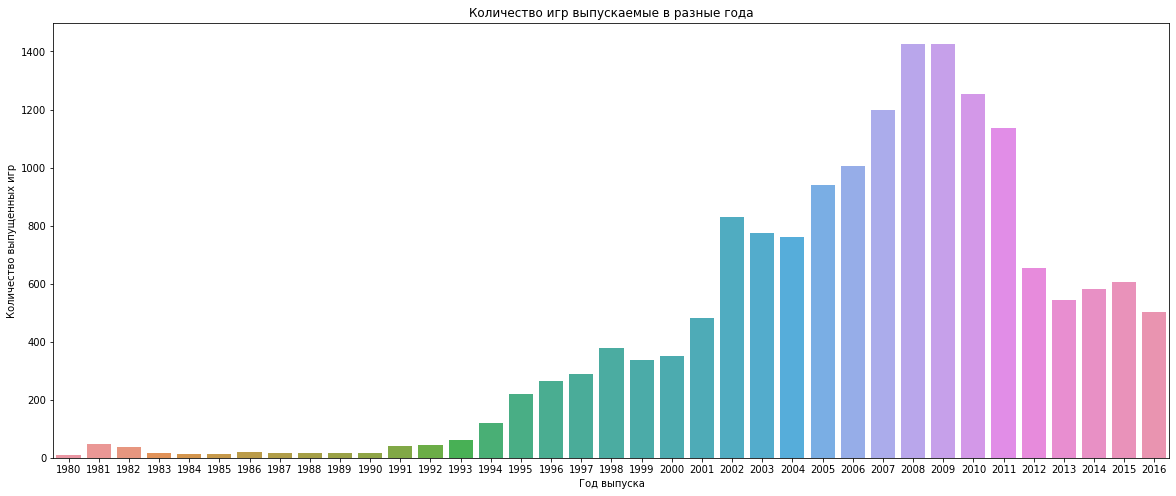

In [43]:

plt.figure(figsize=(20,8))
sns.barplot(data=games_in_years, x="year_of_release", y="name")
plt.title("Количество игр выпускаемые в разные года")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.show()

* Начиная с 90-ых годов прошлого столетия мир компьютерных игр уверенно развивается. Пик по количеству выпускаемых игр пришелся на 2008-2009 гг. Далее мы наблюдаем падение, а с 2012-2013 года небольшую корректировку и количество выпускаемых игр остается в районе 600 в год. Падение скорее всего связано с кризисом 2008 года, после которого инвестору начали аккуратнее подходить к вопросу вложения своих денег, также в это время выходят смартфоны Apple и Samsung, бьющие рекорды продаж и начинается новая эпоха - игр для смартфонов.

* Я думаю, что данные за весь период нам не важны, а достаточно будет **оставить последний пятилетний промежуток с 2012 по 2016 гг.**

### Как менялись продажи по платформам

* Выбираем платформы с наибольшими суммарными продажами

In [44]:
high_sales_platform = game_data.pivot_table(index = 'platform', values='tot_sales', aggfunc='sum').reset_index().sort_values(
by='tot_sales', ascending=False)
high_sales_platform.head()

,platform,tot_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12


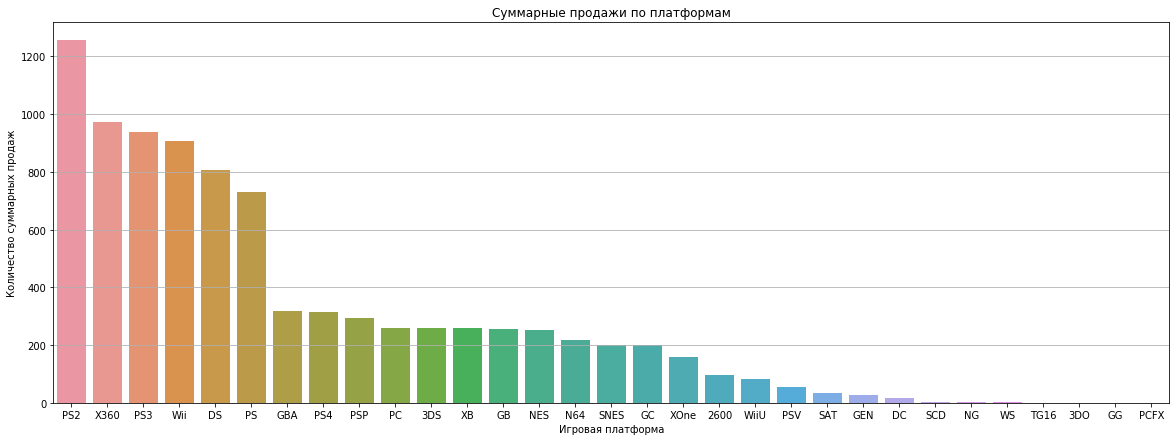

In [45]:
plt.figure(figsize=(20,7))
sns.barplot(data=high_sales_platform, x="platform", y="tot_sales")
plt.grid(axis='y')
plt.title("Суммарные продажи по платформам")
plt.xlabel("Игровая платформа")
plt.ylabel("Количество суммарных продаж")
plt.show()

Самые большие суммарные продажи относятся к следующим платформам:
1) PS2

2) X360

3) PS3

4) Wii

5) DS (Nintendo DS)

6) PS

**РАССМОТРИМ РАСПРЕДЕЛЕНИЕ ПРОДАЖ ПО ГОДАМ**

In [46]:
#оставлю игры только с 2000 года
by_year_sales = game_data[game_data['year_of_release'] > 1999]
by_year_sales = by_year_sales[(by_year_sales['platform']=='PS2') | (by_year_sales['platform']=='X360')| (by_year_sales['platform']=='PS3')
                             | (by_year_sales['platform']=='Wii') | (by_year_sales['platform']=='DS') | (by_year_sales['platform']=='PS')]


In [47]:
by_year_sales_pivot = by_year_sales.pivot_table(index='year_of_release', columns='platform', values='tot_sales', aggfunc='sum')
by_year_sales_pivot.head(12)

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
2000,NaN,96.37,39.17,NaN,NaN,NaN
2001,NaN,35.59,166.43,NaN,NaN,NaN
2002,NaN,6.67,205.38,NaN,NaN,NaN
2003,NaN,2.07,184.31,NaN,NaN,NaN
2004,17.27,NaN,211.81,NaN,NaN,NaN
2005,130.14,NaN,160.66,NaN,NaN,8.25
2006,119.81,NaN,103.42,20.96,137.15,51.62
2007,146.94,NaN,75.99,73.19,152.77,95.41
2008,145.31,NaN,53.90,118.52,171.32,135.26


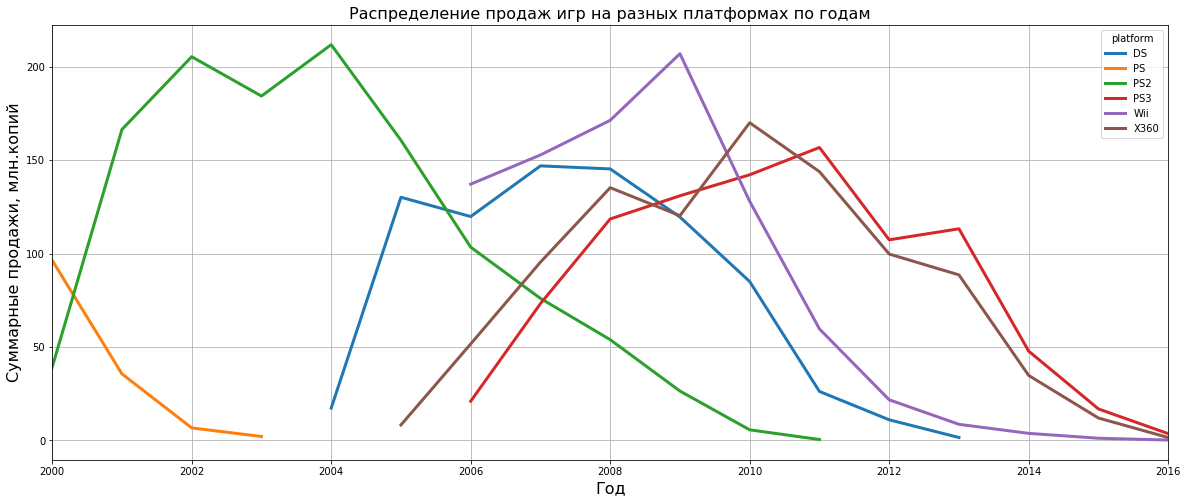

In [48]:
by_year_sales_pivot.plot(grid=True, figsize=(20, 8), linewidth=3)
#plt.plot(data=by_year_sales_pivot)
plt.xlabel('Год', fontsize=16)
plt.ylabel('Суммарные продажи, млн.копий', fontsize=16)
plt.title('Распределение продаж игр на разных платформах по годам', fontsize=16)



plt.show()

По данному графику видно, что средний период "жизни" одной платформы - 10 лет. Хорошо заметно, что за первые 3-4 года на каждой платформе уверенно растут продажи, далее они начинают постепенно снижаться. В 2005-2006 году появляются такие платформы как PS3, Wii и Xbox360 на которых играют и по сей день. Но мы видим как с 2013 года продажи игр на этих платформах падают, т.к. на рынке появляются два гиганта видео-игр: PS4 и Xbox One (правда они тут не отражены, так как не попали в наш топ по суммарным продажам) 

### Возьмем данные за актуальный период

Как я описал ранее - данные за весь период нам не важны, а достаточно будет оставить последний пятилетний промежуток с 2012 по 2016 гг. В этот период уже есть новые и актуальные версии игровых машин, и отсутствуют старые модели приставок, например Play_Station 1 и 2 поколения. А так как данные будут построены на актуальных и "играбельных" платформах, то и прогноз получится намного реальнее.

In [49]:
new_data = game_data[game_data['year_of_release'] > 2011].reset_index(drop=True)

In [50]:
new_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tot_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


In [51]:
new_data.tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tot_sales
2881,Strawberry Nauts,PSV,2016,Adventure,0.0,0.0,0.01,0.0,NaN,NaN,unknown,0.01
2882,Aiyoku no Eustia,PSV,2014,Misc,0.0,0.0,0.01,0.0,NaN,NaN,unknown,0.01
2883,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.0,0.0,0.01,0.0,NaN,NaN,unknown,0.01
2884,Haitaka no Psychedelica,PSV,2016,Adventure,0.0,0.0,0.01,0.0,NaN,NaN,unknown,0.01
2885,Winning Post 8 2016,PSV,2016,Simulation,0.0,0.0,0.01,0.0,NaN,NaN,unknown,0.01


Уже по этим данным видно, что в будущем будет рассматривать актуальные платформы, здесь и 4ая версия Play Station и даже портативка Play Station Vita. Думаю выбор сделан правильно.

### Какие платформы лидируют по продажам, растут или падают?

* По аналогии с общей выборкой рассмотрим распределение продаж по платформам

In [52]:
#посмотрим сводную таблицу
sales_platform_new = new_data.pivot_table(index = 'platform', values='tot_sales', aggfunc='sum').sort_values(
by='tot_sales', ascending=False).reset_index()
sales_platform_new.head()

,platform,tot_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32


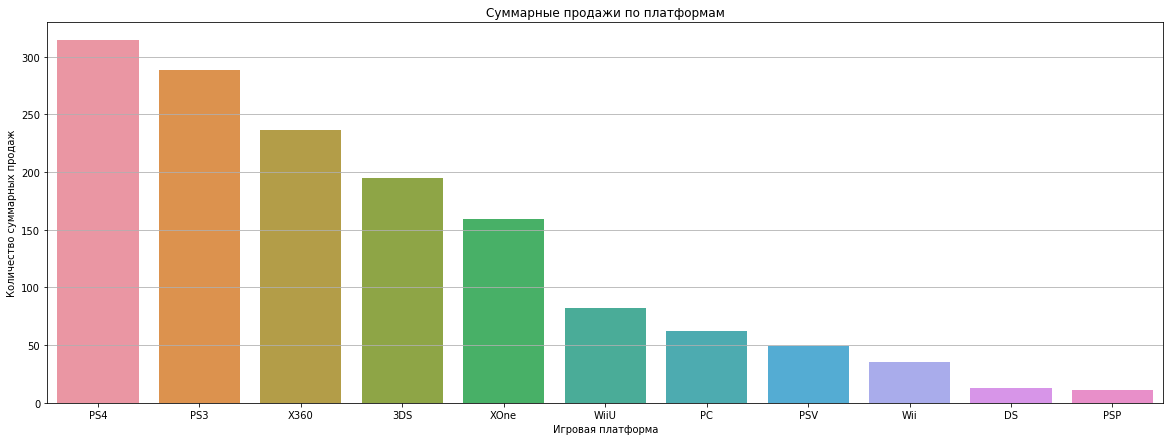

In [53]:
plt.figure(figsize=(20,7))
sns.barplot(data=sales_platform_new, x="platform", y="tot_sales")
plt.grid(axis='y')
plt.title("Суммарные продажи по платформам")
plt.xlabel("Игровая платформа")
plt.ylabel("Количество суммарных продаж")
plt.show()

Ожидаемо, что самые большие продажи у лидеров этой индустрии: Play-Station 3-го и 4-го поколения и Xbox360, а также Nintendo 3DS (поддержка которой прекратилась только в 2020 году). А вот Nintendo DS, которая в общей выборке показывала хороший результат за весь период оказалась чуть ли не на последнем месте (время не щадит никого).

In [54]:
by_year_new_sales_pivot = new_data.pivot_table(index='year_of_release', columns='platform', values='tot_sales', aggfunc='sum')
by_year_new_sales_pivot.head(12)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


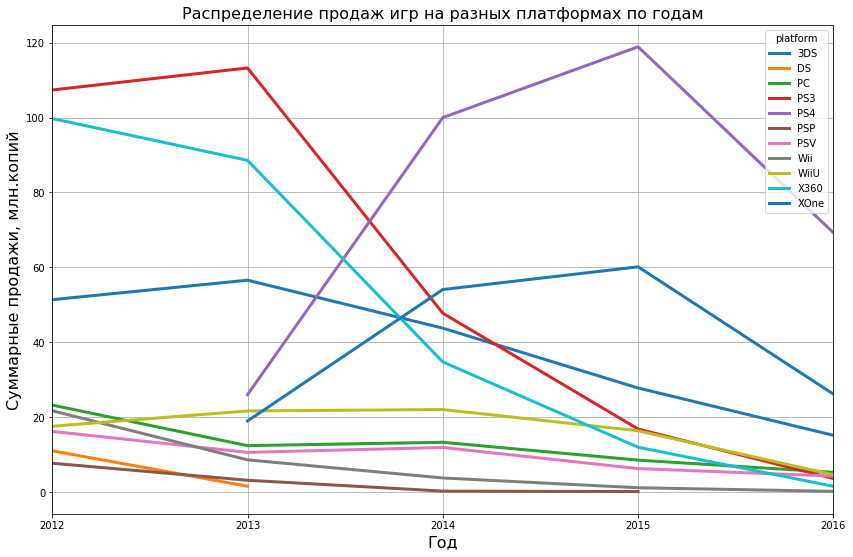

In [55]:
by_year_new_sales_pivot.plot(grid=True, figsize=(14, 9), linewidth=3)
#plt.plot(data=by_year_new_sales_pivot)
plt.xlabel('Год', fontsize=16)
plt.ylabel('Суммарные продажи, млн.копий', fontsize=16)
plt.title('Распределение продаж игр на разных платформах по годам', fontsize=16)


plt.xticks([2012, 2013, 2014, 2015, 2016])
plt.show()

*В процессе выполнения работы добавляю этот комментарий о том, что данные за 2016 год могут быть не полными, продажи посчитаны не до конца, поэтому на всех платформах мы изначально наблюдаем в 2016 году меньше продаж по сравнению с 2015 годом*

На данном графике можно четко заметить следующее распределение среди продаж игр:
* Продажи игр на старых консолях падают, например PS3 и Xbox360 в 2013 году показывают потрясающие продажи в 90-110 млн.копий, однако с выходом новых версий начинают стремительно падать.
* Как я говорил выше продажи игр растут но консолях последних поколений - это PS4, Xbox One, совместно с NINTENDO 3DS эти платформы абсолютные лидеры по количеству проданных копий.
* Окончательное и безоговорочное падение мы наблюдаем у первой версии Play Station и PSP
* На смену PSP в свое время пришла платформа PS Vita, и вместе с PC (персональный компьютер) они показывают приблизительно одинаковый уровень дохода, который на графике показыает небольшую отрицательную корректировку из года в год. Здесь хочу заметить, что судя по графику у PC, PS Vita и WiiU количество фанатов остается примерно на постоянном уровне и игр на данные платформы выходит не так много, так как не наблюдается резких скачков или падений.

### Строим график "ящик с усами" по глобальным продажам игр для платформ

In [56]:
#рассмотрим описательную статистику
new_data.groupby('platform')['tot_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.0400,0.11,0.3125,14.60
DS,31.0,0.404839,1.439245,0.01,0.0200,0.05,0.1850,8.06
PC,250.0,0.250600,0.494640,0.01,0.0300,0.08,0.2400,5.14
PS3,493.0,0.585781,1.462855,0.01,0.0500,0.20,0.6100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.20,0.7300,14.63
PSP,173.0,0.064682,0.071296,0.01,0.0200,0.03,0.0900,0.36
PSV,411.0,0.119659,0.203011,0.01,0.0200,0.05,0.1200,1.96
Wii,54.0,0.655000,1.165447,0.01,0.0625,0.18,0.6875,6.76
WiiU,147.0,0.559116,1.058836,0.01,0.0800,0.22,0.5250,7.09


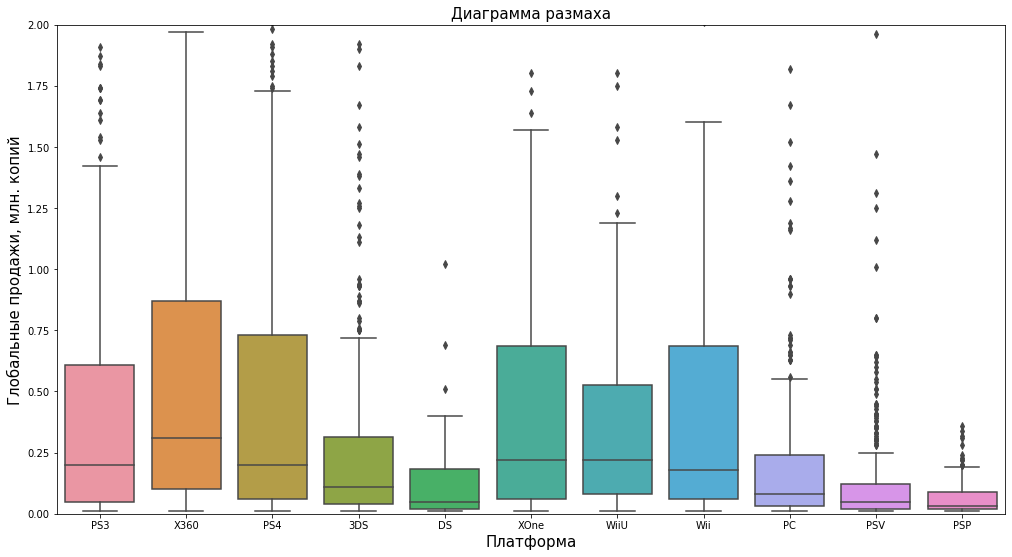

In [57]:
plt.figure(figsize=(17,9))
sns.boxplot(data=new_data, x='platform', y='tot_sales')

plt.title('Диаграмма размаха', fontsize=15)
plt.xlabel('Платформа', fontsize=15)
plt.ylabel('Глобальные продажи, млн. копий',fontsize=15)
plt.ylim([0,2])
plt.show()

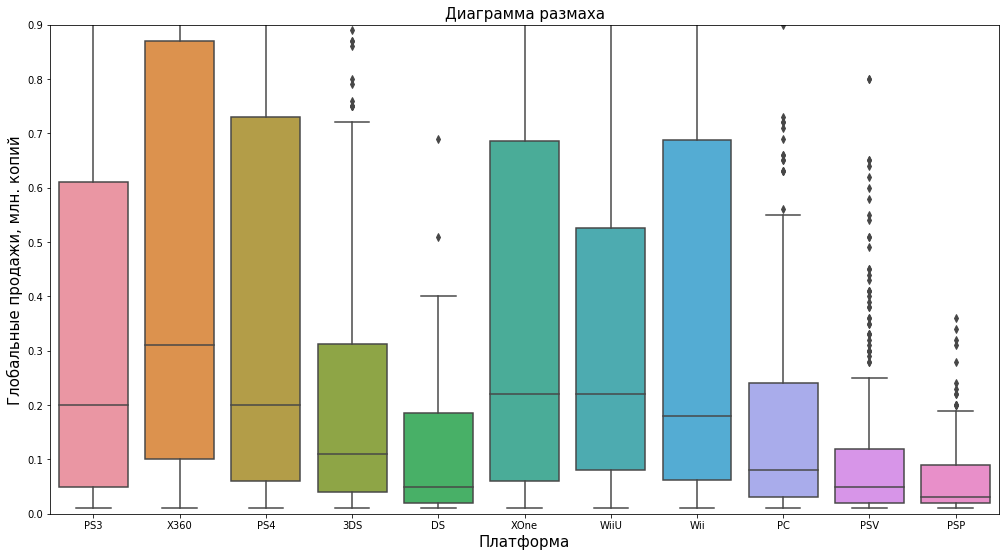

In [58]:
#новая диаграмма размаха
plt.figure(figsize=(17,9))
sns.boxplot(data=new_data, x='platform', y='tot_sales')

plt.title('Диаграмма размаха', fontsize=15)
plt.xlabel('Платформа', fontsize=15)
plt.ylabel('Глобальные продажи, млн. копий',fontsize=15)
plt.ylim([0,0.9])
plt.show()

**Так сравнивать намного удобнее**

* У популярных в тот период платформ (PS3, PS4, WiiU, XOne) медианные продажи находятся примерно на одном уровне 0.2. Чуть ниже  продажи у первой версии Wii, далее расположены продажи на PC и  на портативных консолях (Nintendo 3DS, Nintendo DS, PSP и PS Vita).
* Лидирующие продажи на платформе Xbox 360

### Как влияют на продажи одной популярной платформы отзывы пользователей и критиков

Количество суммарных продаж в период 2012-2016 года самое высокое у PS4, поэтому я решил рассмотреть влияние отзывов пользователей и критиков на продажи именно на этой платформе

In [59]:
# для этой платформы оставим только три стобца: оценку критиков, оценку юзеров и общие продажи
ps4_data = new_data.query('platform == "PS4"')[['critic_score', 'user_score', 'tot_sales']].reset_index(drop=True)

In [60]:
ps4_data.head()

,critic_score,user_score,tot_sales
0,NaN,NaN,14.63
1,97,8.3,12.62
2,82,4.3,8.58
3,NaN,NaN,7.98
4,83,5.7,7.66


In [61]:
# посмотрим на корреляцию между отзыва и продажами
ps4_data.corr()

,critic_score,user_score,tot_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
tot_sales,0.406568,-0.031957,1.000000


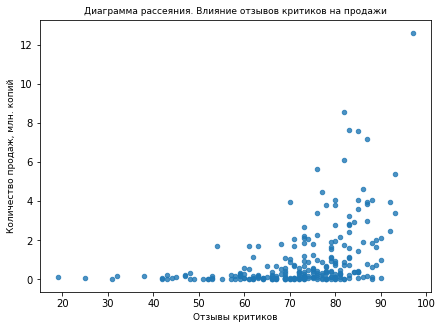

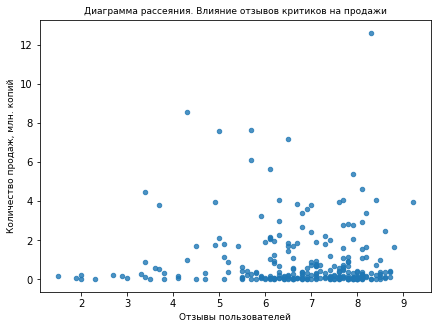

In [62]:
#строю диаграмма рессеяния
ps4_data.plot(x='critic_score', y='tot_sales', kind='scatter', alpha=0.8, figsize=(7,5)) 
plt.title('Диаграмма рассеяния. Влияние отзывов критиков на продажи', fontsize=9)
plt.xlabel('Отзывы критиков', fontsize=9)
plt.ylabel('Количество продаж, млн. копий',fontsize=9)
plt.show()

ps4_data.plot(x='user_score', y='tot_sales', kind='scatter', alpha=0.8, figsize=(7,5)) 
plt.title('Диаграмма рассеяния. Влияние отзывов критиков на продажи', fontsize=9)
plt.xlabel('Отзывы пользователей', fontsize=9)
plt.ylabel('Количество продаж, млн. копий',fontsize=9)

plt.show()



* Коэффициент Пирсона для отзыва критиков равен чуть более 0.4. Это говорит об умеренной тесноте. Для отзыва пользователей коэффициент Пирсона получился вообще отрицательным, т.е. связь мало того, что обратная, она еще и очень слабая.

Получается, что люди действительно прислушиваются к отзывам критиков, и продажи могут зависеть от их оценок. А вот пользовательские отзывы абсолютно не влияют на продажи.


**Теперь соотнесем наши выводы о взаимодействии продаж и оценок не только на PS4, но и на других платформах**

--------Диаграммы рассеяния для платформы: 3DS-------
              critic_score  user_score  tot_sales
critic_score      1.000000    0.722762   0.320803
user_score        0.722762    1.000000   0.197583
tot_sales         0.320803    0.197583   1.000000


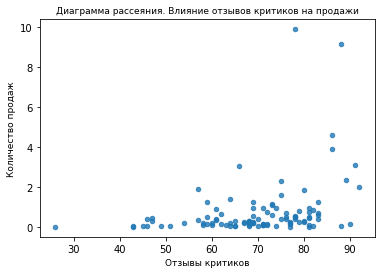

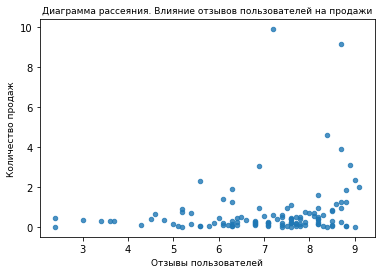

--------Диаграммы рассеяния для платформы: DS-------
              critic_score  user_score  tot_sales
critic_score           NaN         NaN        NaN
user_score             NaN    1.000000   0.882709
tot_sales              NaN    0.882709   1.000000


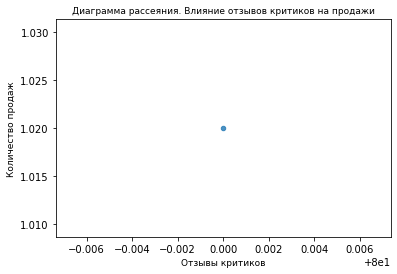

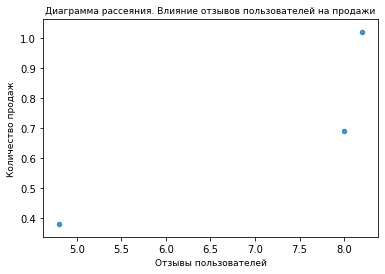

--------Диаграммы рассеяния для платформы: PC-------
              critic_score  user_score  tot_sales
critic_score      1.000000    0.432587   0.237243
user_score        0.432587    1.000000  -0.121867
tot_sales         0.237243   -0.121867   1.000000


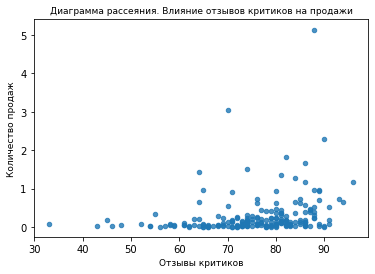

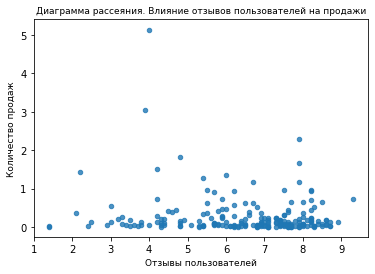

--------Диаграммы рассеяния для платформы: PS3-------
              critic_score  user_score  tot_sales
critic_score      1.000000    0.539456   0.331497
user_score        0.539456    1.000000  -0.005144
tot_sales         0.331497   -0.005144   1.000000


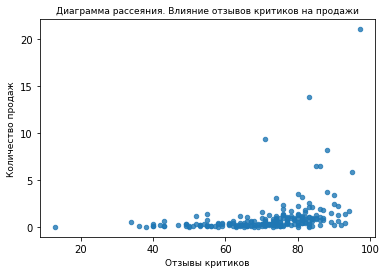

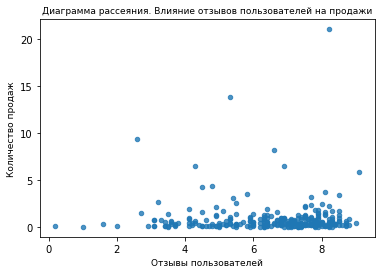

--------Диаграммы рассеяния для платформы: PSP-------
              critic_score  user_score  tot_sales
critic_score           NaN         NaN        NaN
user_score             NaN    1.000000  -0.802302
tot_sales              NaN   -0.802302   1.000000


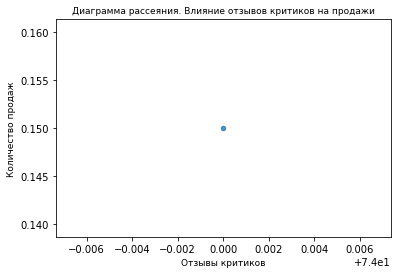

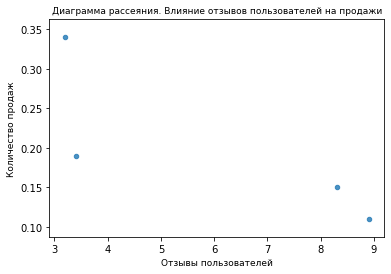

--------Диаграммы рассеяния для платформы: PSV-------
              critic_score  user_score  tot_sales
critic_score      1.000000    0.699199   0.094488
user_score        0.699199    1.000000  -0.004339
tot_sales         0.094488   -0.004339   1.000000


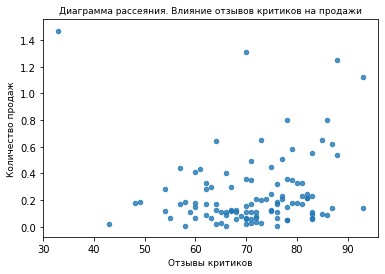

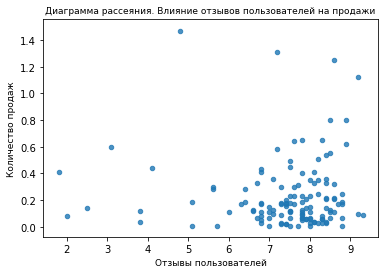

--------Диаграммы рассеяния для платформы: Wii-------
              critic_score  user_score  tot_sales
critic_score      1.000000    0.816295  -0.424341
user_score        0.816295    1.000000   0.296197
tot_sales        -0.424341    0.296197   1.000000


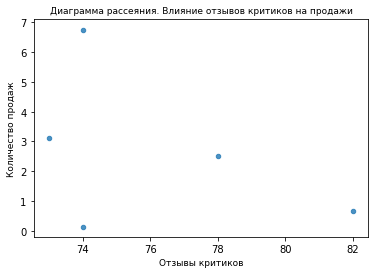

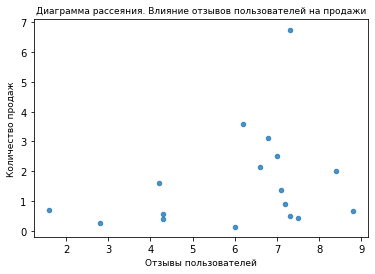

--------Диаграммы рассеяния для платформы: WiiU-------
              critic_score  user_score  tot_sales
critic_score       1.00000    0.770080   0.348380
user_score         0.77008    1.000000   0.400219
tot_sales          0.34838    0.400219   1.000000


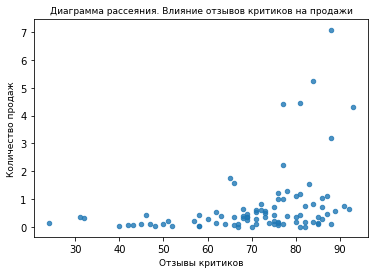

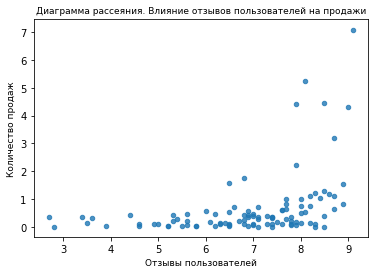

--------Диаграммы рассеяния для платформы: X360-------
              critic_score  user_score  tot_sales
critic_score      1.000000    0.557352   0.360573
user_score        0.557352    1.000000   0.006164
tot_sales         0.360573    0.006164   1.000000


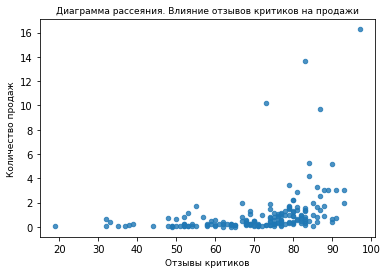

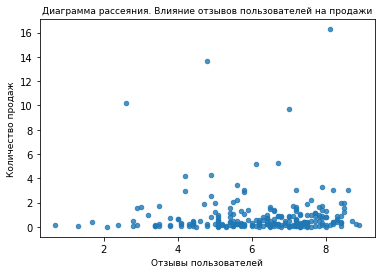

--------Диаграммы рассеяния для платформы: XOne-------
              critic_score  user_score  tot_sales
critic_score      1.000000    0.472462   0.416998
user_score        0.472462    1.000000  -0.068925
tot_sales         0.416998   -0.068925   1.000000


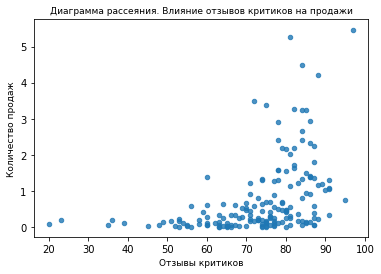

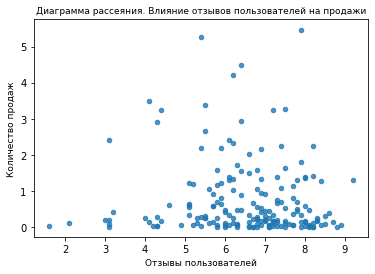

In [63]:
last_platforms = ["3DS", "DS", "PC", "PS3", "PSP", "PSV", "Wii", "WiiU", "X360", "XOne"]
for platforma in last_platforms:
    neww_dat = new_data.query('platform == @platforma')[['critic_score', 'user_score', 'tot_sales']].reset_index(drop=True)
    print('--------Диаграммы рассеяния для платформы: {}-------'.format(platforma))
    print(neww_dat.corr())
    neww_dat.plot(x='critic_score', y='tot_sales', kind='scatter', alpha=0.8, figsize=(6,4)) 
    plt.title('Диаграмма рассеяния. Влияние отзывов критиков на продажи', fontsize=9)
    plt.xlabel('Отзывы критиков', fontsize=9)
    plt.ylabel('Количество продаж',fontsize=9)
    plt.show()

    neww_dat.plot(x='user_score', y='tot_sales', kind='scatter', alpha=0.8, figsize=(6,4)) 
    plt.title('Диаграмма рассеяния. Влияние отзывов пользователей на продажи', fontsize=9)
    plt.xlabel('Отзывы пользователей', fontsize=9)
    plt.ylabel('Количество продаж',fontsize=9)
    plt.show()
    
    



По результатам рассмотрения диаграмм рессеяния и коэффициентов Пирсона я сделал вывод, что схожая ситуация, когда от оценок критиков действительно может зависеть количество продаж (но слабо), наблюдается у таких платформ как *DS, PC, PS3, Xbox360 и XboxOne*. Для этих платформ продажи не зависят (или очень мало зависят) от оценки пользователей.
Немного об остальных платформах:
1) Для NintendoDS обнаружен высокий коэффициент Пирсона для отзывов пользователей и количества продаж. Критики в 2012 году уже и не интересовались этой платформой, а поддержка прекратилась в 2013м году. Получается, что на продажи могли повлиять только любители этой платформы, которые и оставляли отзывы.

2) Про PSP очень сложно сказать что-то однозначное. Последние игры вышли в 2012 году, но на многие из них на разных сайтах действительно отсутствуют оценки критиков. Игровой мир, к сожалению, начал забывать эту консоль и в 2014 году поддержка была окончательно прекращена. Коэффициент Пирсона высокий, но обратный, думаю людям не нравились последние игры, выходящие не этой платформе. Кстати SONY откровенно забила на эту консоль и очень жаль, ведь если бы их аналитики были чуть более подкованы в игровом мире, а не деньгах, то смогли бы прислушаться к пользователям и продажи были бы колоссальными (все мы наблюдаем успехи Nintendo Switch сейчас).

3) Про PS Vita можно сказать следующее: ни оценка критиков, ни оценка юзеров не влияет на продажи. Коэффициент Пирсона также очень слабый. Вообще она обгоняла свое время: сенсорный дисплей, возможность играть с друзьями одновременно, находясь в разных точках, интересный звук, тачпад, 2 камеры и многое другое. Но игры были дорогими, а встроенной памяти не хватало, к тому же выпустив несколько эксклюзивов, японцы не торопились делать новые проекты, а пользователи не торопились идти в магазин.

4) С платформой Wii наоборот очень классная история, ведь в свое время она полюбилась многим пользователям, а люди собирались целой семьей, чтобы поиграть в приставку и повеселиться. Отсюда и хороший коэффициент Пирсона и прямая умеренная зависимость продаж от оценок пользователей. Но почему то с оценкой критиков все наоборот.

5) Также интересный результат у продолжения WiiU. Умеренная корреляция у обоих оценок, и чем они выше, тем лучше продажи :)

### Рассмотрим распределение игр по жанрам. Какие жанры более прибыльные, а какие нет

In [64]:
genres_data = new_data.groupby('genre').count().sort_values(by='name', ascending=False)['name']
genres_data

genre
Action          1031
Role-Playing     370
Adventure        302
Sports           268
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: name, dtype: int64

In [65]:
genres_sales_data = new_data.pivot_table(index='genre', values='tot_sales', aggfunc='sum').sort_values(by='tot_sales', ascending=False)

genres_sales_data

,tot_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.07
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


In [66]:
genres_sales_data_med = new_data.pivot_table(index='genre', values='tot_sales', aggfunc='median').sort_values(by='tot_sales', ascending=False)

genres_sales_data_med

,tot_sales
genre,
Shooter,0.440
Sports,0.240
Platform,0.210
Role-Playing,0.140
Racing,0.140
Fighting,0.130
Action,0.120
Misc,0.120
Simulation,0.120


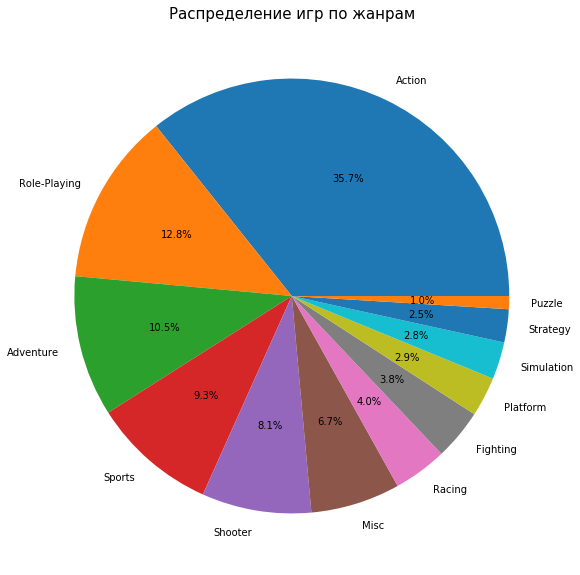

In [67]:
genres_data.plot.pie(autopct='%1.1f%%',figsize=(10, 10))
plt.title('Распределение игр по жанрам', fontsize=15)
plt.ylabel(' ',fontsize=1)

plt.show()

По графику распределения жанров можно выделить топ-5 и сказать, что люди больше всего предпочитают экшн игры, упор в которых делается на физические возможности игрока, скорость его реакции и координации глаз и рук.
Далее следуют ролевые игры и приключения которые дают возможность почувстовать себя внутри динамичных событий, насыщенных головоломками и динамичными приключениями.
Следующие популярные игры - это спортивные: онлайн футбол с друзьями, баскетбол и хоккей. А замыкают наш топ-5 шутеры: когда игрок окружен врагами и хочет хорошенько пострелять.

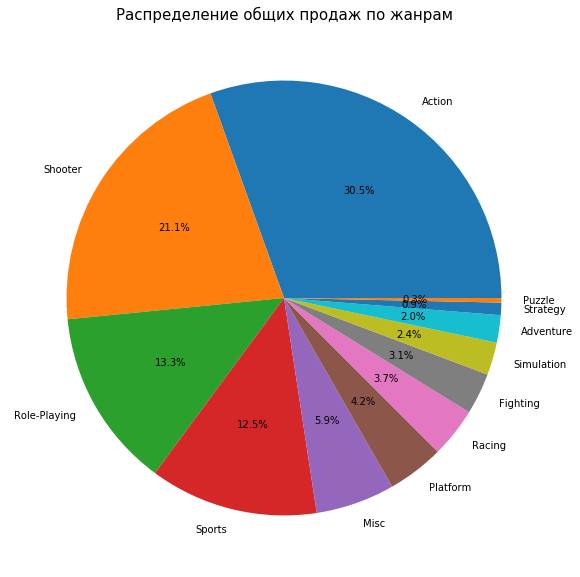

In [68]:
genres_sales_data.plot.pie(autopct='%1.1f%%',figsize=(10, 10), y='tot_sales', legend=False)
plt.title('Распределение общих продаж по жанрам', fontsize=15)
plt.ylabel(' ',fontsize=1)

plt.show()

Около 75% от общих продаж по жанрам представлены в следраприбыльные жанры: экшн, шутеры, ролевые и спортивные игры. А вот приключенческий жанр мы здесь уже не наблюдаем, по общим продажам он занимаем уже третье место с конца списка.

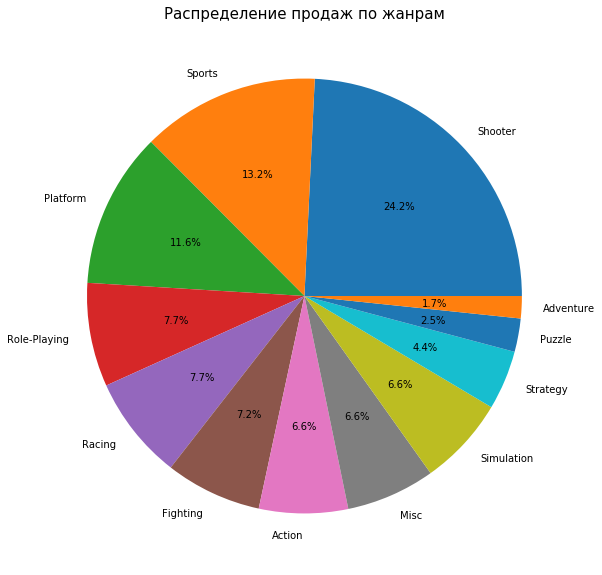

In [69]:
genres_sales_data_med.plot.pie(autopct='%1.1f%%',figsize=(10, 10), y='tot_sales', legend=False)
plt.title('Распределение продаж по жанрам', fontsize=15)
plt.ylabel(' ',fontsize=1)

plt.show()

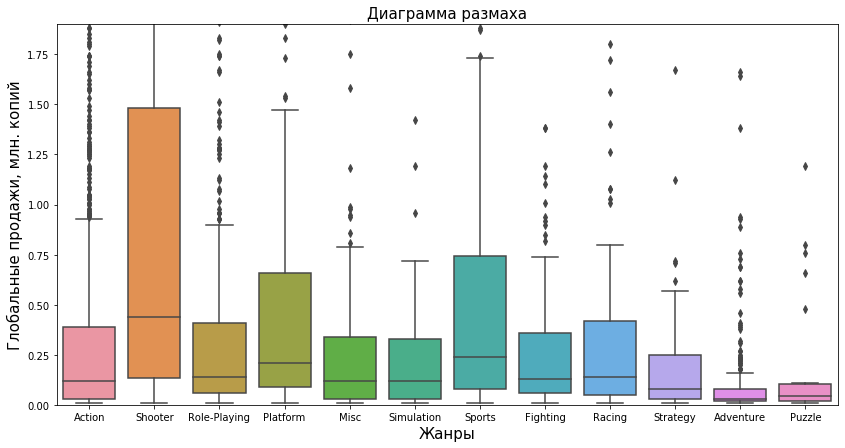

In [70]:
plt.figure(figsize=(14,7))
sns.boxplot(data=new_data, x='genre', y='tot_sales')

plt.title('Диаграмма размаха', fontsize=15)
plt.xlabel('Жанры', fontsize=15)
plt.ylabel('Глобальные продажи, млн. копий',fontsize=15)
plt.ylim([0,1.9])
plt.show()

Оценивая эффективность продаж можно сказать, что сильнее всех выделяются жанры: шутер и спорт - продажи игр таких жанров намного лучше остальных. Хуже всего продаются игры приключенческие и головоломки. 

* Общий вывод по шагу 3 будет в общем выводе

## Шаг 4. Составьте портрет пользователя каждого региона

### Для пользователя каждого региона (NA, EU, JP) определяем самые популярные платформы (топ-5) и опишем различия в долях продаж.

In [71]:
# вспомним нашу таблицу
new_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tot_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


In [72]:
#запишем в словарь сводные таблицы по регионам
regions_data = {}
regions = ['na_sales', 'eu_sales', 'jp_sales']
for region in regions:
    regions_data[region] = new_data.pivot_table(index='platform', values=region, aggfunc='sum').sort_values(
        by=region, ascending=False).head()
regions_data

{'na_sales':           na_sales
 platform          
 X360        140.05
 PS4         108.74
 PS3         103.38
 XOne         93.12
 3DS          55.31,
 'eu_sales':           eu_sales
 platform          
 PS4         141.09
 PS3         106.86
 X360         74.52
 XOne         51.59
 3DS          42.64,
 'jp_sales':           jp_sales
 platform          
 3DS          87.79
 PS3          35.29
 PSV          21.04
 PS4          15.96
 WiiU         13.01}

In [73]:
#display(regions_data['na_sales'])

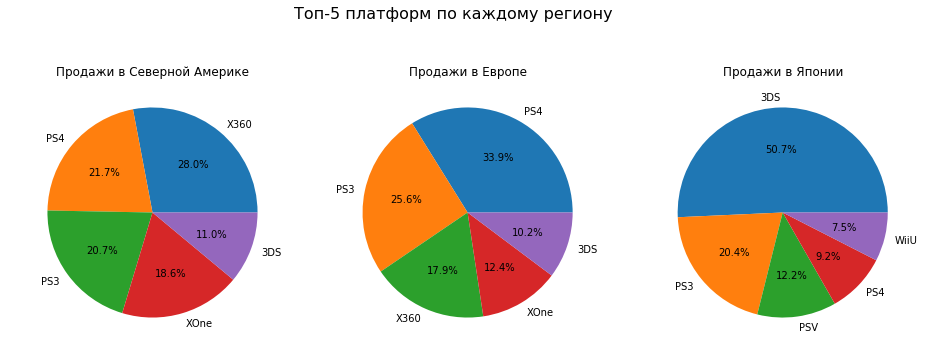

In [74]:
fig, axes = plt.subplots(1, 3)
regions_data['na_sales'].plot.pie(figsize=(16,6), autopct='%1.1f%%', y='na_sales', ax = axes[0], legend=False)
regions_data['eu_sales'].plot.pie(autopct='%1.1f%%', y='eu_sales', ax = axes[1], legend=False)
regions_data['jp_sales'].plot.pie(autopct='%1.1f%%', y='jp_sales', ax = axes[2], legend=False)
axes[0].set_title("Продажи в Северной Америке", fontsize = 12)
axes[0].set_ylabel(" ")
axes[1].set_title("Продажи в Европе", fontsize = 12)
axes[1].set_ylabel(" ")
axes[2].set_title("Продажи в Японии", fontsize = 12)
axes[2].set_ylabel(" ")

plt.suptitle("Топ-5 платформ по каждому региону", fontsize = 16)

plt.show()

**Вывод**:

В каждом регионе отличается лидирующая платформа. В Северной Америке - это Xbox360, в Европе это PlayStation4, в Японии - это Nintendo 3DS. Пользователи Северной Америки и Европы пользуются одинаковыми платформами, но они распределены по разному. В Японии предпочитают японские платформы - Nintendo и Sony PlayStation разных модификаций. Также можно отметить, что PS3 почти одинаково популярна во всех регионах.

### Самые популярные жанры (топ-5) для каждого региона

In [75]:
#запишем в словарь сводные таблицы по регионам
regions_data_platform = {}
regions = ['na_sales', 'eu_sales', 'jp_sales']
for region in regions:
    regions_data_platform[region] = new_data.pivot_table(index='genre', values=region, aggfunc='sum').sort_values(
            by=region, ascending=False).head()
regions_data_platform

{'na_sales':               na_sales
 genre                 
 Action          177.84
 Shooter         144.77
 Sports           81.53
 Role-Playing     64.00
 Misc             38.19,
 'eu_sales':               eu_sales
 genre                 
 Action          159.34
 Shooter         113.47
 Sports           69.09
 Role-Playing     48.53
 Racing           27.29,
 'jp_sales':               jp_sales
 genre                 
 Role-Playing     65.44
 Action           52.80
 Misc             12.86
 Simulation       10.41
 Fighting          9.44}

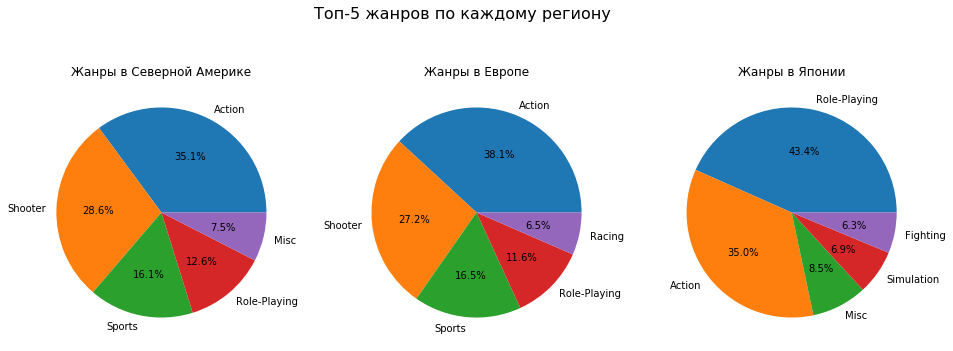

In [76]:
fig, axes = plt.subplots(1, 3)
regions_data_platform['na_sales'].plot.pie(figsize=(16,6), autopct='%1.1f%%', y='na_sales', ax = axes[0], legend=False)
regions_data_platform['eu_sales'].plot.pie(autopct='%1.1f%%', y='eu_sales', ax = axes[1], legend=False)
regions_data_platform['jp_sales'].plot.pie(autopct='%1.1f%%', y='jp_sales', ax = axes[2], legend=False)
axes[0].set_title("Жанры в Северной Америке", fontsize = 12)
axes[0].set_ylabel(" ")
axes[1].set_title("Жанры в Европе", fontsize = 12)
axes[1].set_ylabel(" ")
axes[2].set_title("Жанры в Японии", fontsize = 12)
axes[2].set_ylabel(" ")

plt.suptitle("Топ-5 жанров по каждому региону", fontsize = 16)

plt.show()

**Выводы**:

В Европе и Северной Америке популярные жанры почти одинаковы, только в Европе люди больше играют в гонки, а в Северной Америке у людей очень много игр, жанр которых не подходит под какое-то прямое описание *misc* - это что-то новое и необычное. Можно предположить, что характер и темперамент у игроков из Европы и Америки примерно одинаковый. 

А вот культура в Японии очень отличается от остального мира, люди предпочитают играть в RPG, которые основаны на решении проблем, статистическом развитии персонажа и участии в боях. Также японцы больше любят файтинги и различные симуляторы. 

А вот жанр *action* практически одинаково популярен в каждом регионе.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [77]:
raiting_table = new_data.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
raiting_table

,eu_sales,jp_sales,na_sales
rating,,,
E,113.03,28.33,114.37
E10+,55.37,8.19,75.70
M,193.96,21.20,231.57
T,52.96,26.02,66.02
unknown,91.50,108.84,103.31


In [78]:
#запишем в словарь сводные таблицы по регионам
regions_data_raiting = {}
regions = ['na_sales', 'eu_sales', 'jp_sales']
for region in regions:
    regions_data_raiting[region] = new_data.pivot_table(index='rating', values=region, aggfunc='sum').sort_values(
            by=region, ascending=False)
regions_data_raiting

{'na_sales':          na_sales
 rating           
 M          231.57
 E          114.37
 unknown    103.31
 E10+        75.70
 T           66.02,
 'eu_sales':          eu_sales
 rating           
 M          193.96
 E          113.03
 unknown     91.50
 E10+        55.37
 T           52.96,
 'jp_sales':          jp_sales
 rating           
 unknown    108.84
 E           28.33
 T           26.02
 M           21.20
 E10+         8.19}

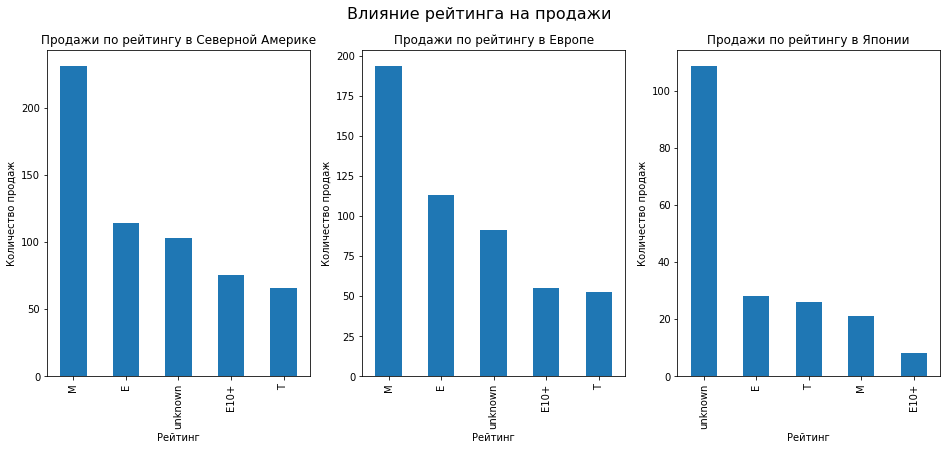

In [79]:
fig, axes = plt.subplots(1, 3)
regions_data_raiting['na_sales'].plot.bar(figsize=(16,6), y='na_sales', ax = axes[0], legend=False)
regions_data_raiting['eu_sales'].plot.bar(y='eu_sales', ax = axes[1], legend=False)
regions_data_raiting['jp_sales'].plot.bar(y='jp_sales', ax = axes[2], legend=False)
axes[0].set_title("Продажи по рейтингу в Северной Америке", fontsize = 12)
axes[0].set_xlabel("Рейтинг")
axes[0].set_ylabel("Количество продаж")
axes[1].set_title("Продажи по рейтингу в Европе", fontsize = 12)
axes[1].set_xlabel("Рейтинг")
axes[1].set_ylabel("Количество продаж")
axes[2].set_title("Продажи по рейтингу в Японии", fontsize = 12)
axes[2].set_xlabel("Рейтинг")
axes[2].set_ylabel("Количество продаж")

plt.suptitle("Влияние рейтинга на продажи", fontsize = 16)

plt.show()

**Рейтинги:**

1) E («Everyone»)— «Для всех»;

2) E10+ («Everyone 10 and older»)— «Для всех старше 10 лет»;

3) T («Teen») - «Подросткам»: Игра подходит для лиц от 13 лет и старше;

4) M («Mature») — «От 17 лет»;

**5) А вот тут и появляется наш ``unknown`` жанр**

**Выводы**:

Влияние рейтинга на продажи в Северной Америке и Европе одинаковое, на первом месте игры с рейтингом «Mature». Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.

Далее идут игры с рейтингом "Для всех", содержащие минимальное насилие, в основном «мультяшного» характера.

Потом «Для всех старше 10 лет» - которые могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови.

Замыкаются продажи на рейтинге «Teen» - это игры с грубым юмором, в меру откровенным сексуальным содержимым, кровью и нечастым использованием ненормативной лексики.

**Новое. Для северной Америки и Европы наш неизвестный рейнтинг расположился посередине. Тут на мой взгляд можно сделать предположение о том, что большинство пропущенных рейтингов это Е и Е10+**

---В Японии рейтинг влияет на продажи немного иначе---

**Новое. А в Японии наш неизвестный рейтинг вообще на первом месте. И получается, что для этого региона очень много пропущенных значений. Тут как раз можно вывести гипотезу о том, что у каждого региона своя система возрастного рейтинга. И то, что популярно и играбельно в Северной Америке не так популярно в Японии**

Больше всего игр с минимальным насилием, далее игры для подростков от 13 лет, третьими в очереди игры для людей от 17 лет и выше, содержащие достаточное количество насилия, грубую ненормативную лексику и большое количество крови. Меньше всего игр с рейтингом «Для всех старше 10 лет».

## Шаг 5. Проверка гипотез

### Проверка гипотезы 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

В Python есть специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: 
* scipy.stats.ttest_ind (array1, array2,equal_var)

Если параметр *equal_var* не указывать, то по умолчанию он примет значение _True_, т.е. будет считать, что наши дисперсии равны.
Но в своем случае, опираясь на полученные теоретические знания, я буду использовать «правило большого пальца»: если выборки разного размера и/или можно предположить, что дисперсии у генеральных совокупностей разные — укажем *equal_var = False* при вызове метода scipy.stats.ttest_ind().

_H0_- средние пользовательские рейтинги платформ Xbox One и PC одинаковые

_H1_- средние пользовательские рейтинги платформ Xbox One и PC различаются

Уровень значимости обычно обозначается греческой буквой «альфа». Популярными уровнями значимости являются 5%, 1% и 0.1%. Для данного исследования я приму менее строгую α = 0.05.

In [80]:
# series с рейтингами XboxOne
xone_r = new_data.query('platform == "XOne"')['user_score'].dropna() #удалим пропущенные значения
# series с рейтингами PC
pc_r = new_data.query('platform == "PC"')['user_score'].dropna() #удалим пропущенные значения

In [81]:
xone_r

31      7.9
34      5.4
44      6.4
53      6.2
69      4.1
       ... 
2820    6.8
2840    6.0
2854    8.2
2858    6.6
2867    6.7
Name: user_score, Length: 182, dtype: float32

In [82]:
alpha = 0.05

In [83]:
results = st.ttest_ind(xone_r, pc_r, equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, рейтинги рассматриваемых платформ различаются ")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.5489560454239967
Не получилось отвергнуть нулевую гипотезу


Так как нулевую гипотезу отвергуть не получилось, то можно сделать вывод о том, что cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.

In [84]:
#посмотрим на средние значения рейтингов для платформ. сделаем сводную таблицу и найдем среднее значение
gip_plat = new_data[(new_data['platform'] == 'XOne') | (new_data['platform'] == 'PC')]

In [85]:
gip_plat_pivot = gip_plat.pivot_table(index='platform', values='user_score', aggfunc='mean')
print('----------Средние пользовательские рейтинги платформ Xbox One и PC------------')
gip_plat_pivot

----------Средние пользовательские рейтинги платформ Xbox One и PC------------


,user_score
platform,
PC,6.428641
XOne,6.521429


Дейсвительно, эти рейтинги не сильно различаются - всего на 0,1 балла.

### Проверка гипотезы 2. Средние пользовательские рейтинги жанров Action и Sports разные.

По аналогии с гипотезой 1 сформируем нулевую и первую гипотезы:

_H0_- средние пользовательские рейтинги жанров Action и Sport одинаковые

_H1_- средние пользовательские рейтинги жанров Action и Sport различаются

Для данного исследования я также приму α = 0.05.

In [86]:
# series с рейтингами жанра Action
action_r = new_data.query('genre == "Action"')['user_score'].dropna() #удалим пропущенные значения
# series с рейтингами жанра Sports
sports_r = new_data.query('genre == "Sports"')['user_score'].dropna() #удалим пропущенные значения

In [87]:
alpha_1 = 0.05

In [88]:
results_1 = st.ttest_ind(action_r, sports_r, equal_var = False)

print('p-значение: ', results_1.pvalue)

if results_1.pvalue < alpha_1:
    print("Отвергаем нулевую гипотезу, рейтинги по жанрам различаются ")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  4.2428970996510126e-20
Отвергаем нулевую гипотезу, рейтинги по жанрам различаются 


In [89]:
#посмотрим на средние значения рейтингов для платформ. сделаем сводную таблицу и найдем среднее значение
gip_genre = new_data[(new_data['genre'] == 'Action') | (new_data['genre'] == 'Sports')]

In [90]:
gip_genre_pivot = gip_genre.pivot_table(index='genre', values='user_score', aggfunc='mean')
print('----------Средние пользовательские рейтинги жанров Action и Sports------------')
gip_genre_pivot

----------Средние пользовательские рейтинги жанров Action и Sports------------


,user_score
genre,
Action,6.825048
Sports,5.455897


Средние рейтинги игр этих жанров различаются на 1.4 балла, т.е. на 15% по десятибалльной шкале.

## Общий вывод

**Предобработка данных:**
1) Привели название столбцов к нижнему регистру

2) Пропущенные значения в Name и Genre были удалены из-за невозможности восстановить такие данные

3) Год релига приведен к целочисленному типу

4) Значение пользовательской оценки в User_Score приведено к типу float

5) Пропущенные значения в Year_of_Release, Critic_Score, User_Score, Rating оставили пустыми по следующим причинам:

* год издания игры конечно можно найти в наименовании, но делать это очень трудно, а таких значений 269. Не факт, что год, указанный в наименовании игры соответствует году издания;
* значения рейтинга лучше не заполнять, ведь присвоенные значения не будут отражать действительность. Мы не знаем из какого источника взят рейтинг и насколько точно он отражает настроение критиков и геймейров да и еще вопрос как их заполнять? Нельзя заполнить их средним рейтингом по жанру, или по году - это может сильно изменить нашу статистику.

**Анализ датасета:**

* Начиная с 90-ых годов прошлого столетия мир компьютерных игр уверенно развивается. Пик по количеству выпускаемых игр пришелся на 2008-2009 гг. Далее мы наблюдаем падение, а с 2012-2013 года небольшую корректировку и количество выпускаемых игр остается в районе 600 в год. 

* Средний период "жизни" одной платформы - 10 лет. По графикам из пункта 3.2 заметно, что за первые 3-4 года на каждой платформе уверенно растут продажи, далее они начинают постепенно снижаться. 

* Самые большие суммарные продажи в промежутке с 2000 по 2016 относятся к следующим платформам: 1) PS2; 2) X360; 3) PS3 ; 4) Wii; 5) DS (Nintendo DS); 6) PS.


 **Акутальным в данной работе выбран последний пятилетний промежуток с 2012 по 2016 гг.** 
* В этом промежутке самые большие продажи у лидеров этой индустрии: Play-Station 3-го и 4-го поколения и Xbox360, а также Nintendo 3DS.

* Но с выходом новых версий продажи игр на PS3 и Xbox360 с 2013 года начинают падать (также они падают и у портативных консолей - PSP и PS Vita), поэтому стоить обратить внимание на их предшественников - это PS4, Xbox One - развивающиеся консоли, а также NINTENDO 3DS, но уже в меньших масштабах. 

* PC показывает свою стабильность, хотя много с этой платформы, как с игровой, не зарабатывают, она актуальна по сей день, т.к. огромное количество пользователей играет именно на компьютере, а не на приставках. 

* Для большинства платформ мы также можем отметить, что от оценок критиков (пусть и слабо) могут зависеть продажи игры, а вот от оценок пользователей продажи зачастую не зависят вообще.

* Экшн, ролевые и приключенческие игры - это самые популярные жанры среди игроков. Они занимают 36%, 13% и 11% от общего распредления соответственно. Кстати экшн и ролевые являются одновременно и самыми прибыльными, а вместо приключенсческих игр больше денег приносят шутеры. Спортивные игры остаются на 4м месте по популярности жанра и его общего дохода за последние 5 лет.

* Самые интенсивные продажи у жанров шутер и спорт


 **Портрет пользователей** 

Лидирующая платформа отличается в каждом регионе. В Северной Америке - это Xbox360, в Европе это PlayStation4, в Японии - это Nintendo 3DS. Пользователи Северной Америки и Европы пользуются одинаковыми платформами, только в разном соотношении. В Японии предпочитают японские платформы - Nintendo и Sony PlayStation разных модификаций. Также можно отметить, что PS3 почти одинаково популярна во всех регионах.

Мы также обнаружили, что в Европе и Северной Америке популярные жанры почти одинаковы, только в Европе люди больше играют в гонки, а в Северной Америке у людей очень много игр, жанр которых не подходит под какое-то прямое описание misc - это что-то новое и необычное. А вот предпочтения японцев отличаются. Там люди любят играть в RPG, которые основаны на решении проблем, статистическом развитии персонажа и участии в боях. Также японцы больше любят файтинги и различные симуляторы. Но вот жанр action практически одинаково популярен в каждом регионе.

Что касается рейтинга ESRB, то его влияние на продажи в Северной Америке и Европе одинаковое, на первом месте по количеству продаж игры с рейтингом «Mature» - М, далее игры с рейтингом "Для всех" - Е, потом «Для всех старше 10 лет» - E10+, а затем «Teen» - Т.
А вот в Японии опять все иначе: Е, Т, М, Е10+.
________________________
**Новое. Что касается рейтинга ESRB. Он предоставляет рейтинги видеоигр только для США, Канады и Мексики. Для стран Европы существует свой классификатор - PEGI, что означает «Общеевропейская игровая информация». Иногда им пользуются и в России, хотя основным руководством по оценке игр считается федеральный закон «О защите детей от информации, причиняющей вред их здоровью и развитию». В Японии есть CERO (Организация компьютерных рейтингов развлечений), которая присваивает играм рейтинги букв.**

**В разных странах у одной и той же игры может быть разный рейтинг. На него влияют менталитет, культура и религия, а также многие другие факторы. Хороший пример разницы в восприятии контента разными странами — это игра Sims.**

*Она получила следующие рейтинги:
- ACB (Австралия): M
- РСВР (Россия): 18+
- PEGI: 12+
- ESRB: T — для подростков
- USK (Германия): 6+

Т.е. в России в Sims 4 может играть человек, который уже может купить себе сигареты и алгоколь, в Америке - подросток, а в Европе - любой первоклассник. 

И здесь возник конфлик и было решено заполнить пропуски значением ``unknown``. Для Америки и Европы мы получили пропусков примерно на 100 млн.продаж, что говорит о том, что рейтинги этих регионов немного коррелируют между собой и в среднем они схожи. А вот абсолютно иная картина представлена для Японии. Можно сделать вывод, что ESRB рейтинг не соответствует данному региону и мы знаем, что там есть свой орган - это CERO (Организация компьютерных рейтингов развлечений) - такие оценки будут более достоверны. И в целом они будут достоверны, если для каждого региона будет применяться своя категория оценок на основании существующего внутрирегионального классификатора.

________________
**Проверка гипотез**
 
Первая гипотеза о том, что средние пользовательские рейтинги платформ *Xbox One* и *PC* одинаковые подтвердилась. Действительно, разница составляет 0,1 балла, а выглядят они так: у PC средний рейтинг 6.42, а у игра на Xbox One - 6.52 баллов.

Вторая гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные тоже подтвердилась. Средний рейтинг у игр жанра 	*Action* - 6.83, а у игр жанра *Sports* - 5.45.

В заключении можно сказать, что потенциально прибыльным продуктом будут те игры, которые будут выходить на новые платформы: Xbox One и PS4, а также их предшественников Xbox 360 и PS3 (для Японии - Nintento 3DS или Wii). Эти игры будут с рейтингом "Для всех" или «Mature» и относиться к жанру Action, Shooter и Sports (для Японии Role-Playing).